# Praca domowa 1
## Klaudia Gruszkowska

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# wczytanie danych 
forest_fires_df = pd.read_csv('forest_fires_dataset.csv')

# pierwsze kilku wierszy
forest_fires_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [3]:
#inne informacje o danych
forest_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


**WNIOSEK: W ramce danych nie ma braków danych.**

In [4]:
# przegląd kilku statystycznych danych o kolumnach
forest_fires_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


W tym przypadku z opisu danych wiemy, że tylko month i day są danymi kategorycznymi, dlatego nie są uwzględnione w podsumowaniu. Możemy już zauważyć, że np. wartości 'area' są mocno zagęszczone blisko zera ponieważ 75% wartości jest mniejsza od 6.57 a maksymalna wartość to aż 1090.84 . Może to być np. jeden wyjątkowy i duży pożar, który nie pokrywa się z normalnym trendem. Możemy się przyjrzeć rozkładowi tej zmiennej.

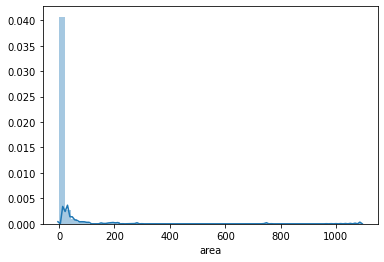

In [5]:
sns.distplot(forest_fires_df['area']);

Wnioski z wykresu:
- Rozkład zmiennej 'area' odbiega od rozkładu normalnego.
- Rozkład jest mocno pochylony do zera.

In [6]:
print("Skośność: %f" % forest_fires_df['area'].skew())

Skośność: 12.846934


Text(0.5, 1.0, 'Zmienna area')

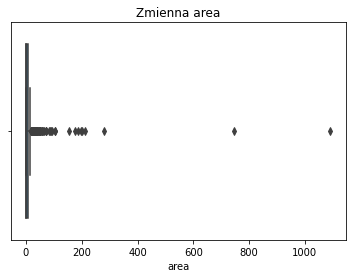

In [7]:
box_plot = sns.boxplot(forest_fires_df['area'])
box_plot.set_title('Zmienna area')

Po narysowaniu wykresu boxplot z zmiennej celu widzimy, że znacząca większość danych znajduje się blisko zera. Zgodnie z opisem danych do modelowania można wziąć pod uwagę ln(x).

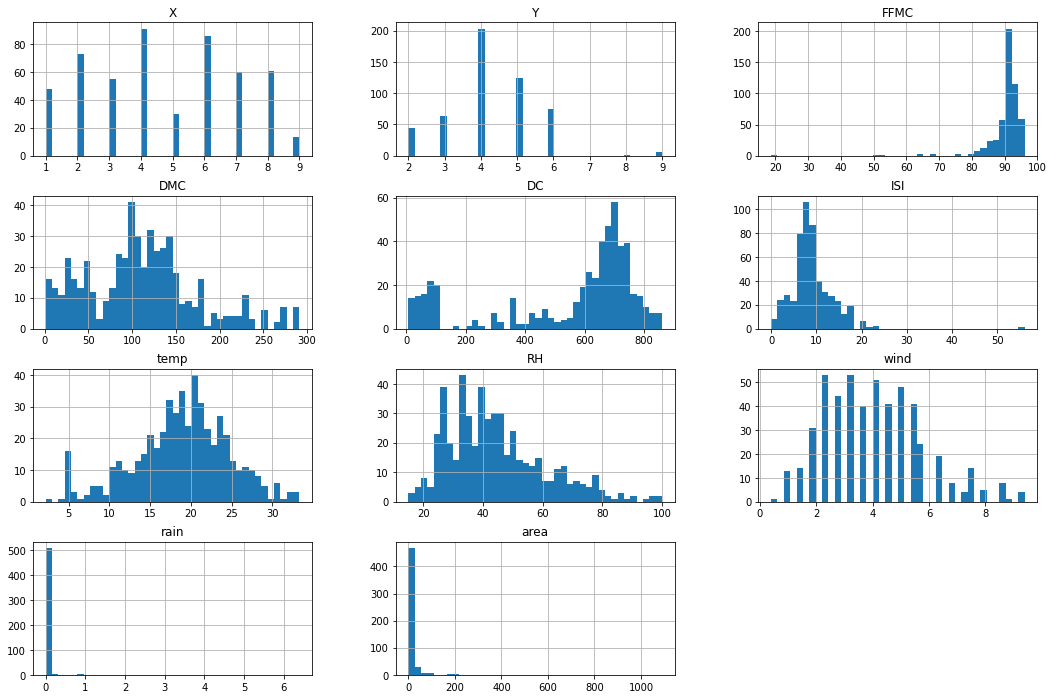

In [8]:
# wykresy rozkładów zmiennych
forest_fires_df.hist(figsize=(18,12),bins =40)
plt.show()

Z powyższych wykresów mogą zastanawiać nas w szczególności FFMC, ISI, rain i area, które są mocno skupione na jednym z krańców swojego przedziału. 

In [9]:
forest_fires_df["wind"].value_counts()

2.2    53
3.1    53
4.0    51
4.9    48
2.7    44
4.5    41
5.4    41
3.6    40
1.8    31
5.8    24
6.3    19
1.3    14
7.6    14
0.9    13
6.7     8
8.5     8
8.0     5
9.4     4
7.2     4
8.9     1
0.4     1
Name: wind, dtype: int64

In [10]:
forest_fires_df["rain"].value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
1.4      1
6.4      1
1.0      1
Name: rain, dtype: int64

Text(0.5, 1.0, 'Zmienna rain')

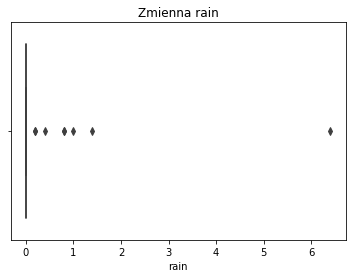

In [11]:
box_plot = sns.boxplot(forest_fires_df['rain'])
box_plot.set_title('Zmienna rain')

Powyższy boxplot pokazuje nam, że zmienna rain posiada wartości odstające. Widzimy też, że wynosi głównie zero (98%) z tego wynika, że nie wnosi dużo informacji do wyniki. Możemy ją usunąć z danych a nie wpłynie znacząco na późniejszą predykcję.

In [12]:
forest_fires_df["FFMC"].value_counts()

91.6    28
92.1    28
91.0    22
91.7    19
93.7    16
        ..
86.8     1
94.4     1
18.7     1
88.3     1
86.3     1
Name: FFMC, Length: 106, dtype: int64

Text(0.5, 1.0, 'Zmienna FFMC')

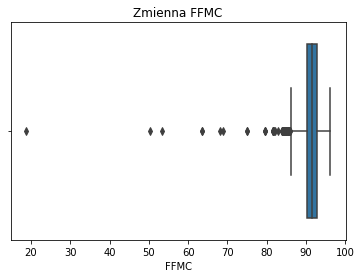

In [13]:
box_plot = sns.boxplot(forest_fires_df['FFMC'])
box_plot.set_title('Zmienna FFMC')

Boxplot potwierdził, że zmienna FFMC posiada wartości odstające.

In [15]:
#usuwanie wartości odstających
forest_fires_df.sort_values(by = 'FFMC')[:2]
forest_fires_df_2 = forest_fires_df.drop(forest_fires_df[forest_fires_df['FFMC'] == 18.7].index)

Text(0.5, 1.0, 'Zmienna FFMC po usunięciu jednej wartości odstającej')

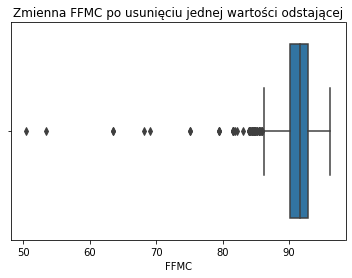

In [16]:
box_plot = sns.boxplot(forest_fires_df_2['FFMC'])
box_plot.set_title('Zmienna FFMC po usunięciu jednej wartości odstającej')

In [17]:
forest_fires_df["ISI"].value_counts()

9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
2.3      1
14.4     1
7.9      1
16.3     1
7.3      1
Name: ISI, Length: 119, dtype: int64

Text(0.5, 1.0, 'Zmienna ISI')

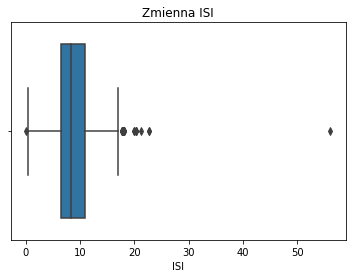

In [18]:
box_plot = sns.boxplot(forest_fires_df['ISI'])
box_plot.set_title('Zmienna ISI')

Tak samo jak ze zmienną FFMC , ISI posiada wyróżniającą się wartość odstającą.

In [19]:
forest_fires_df.sort_values(by = 'ISI', ascending = False)[:2]
forest_fires_df_2 = forest_fires_df_2.drop(forest_fires_df_2[forest_fires_df_2['ISI'] == 56.1].index)

Text(0.5, 1.0, 'Zmienna ISI po usunięciu jednej wartości odstającej')

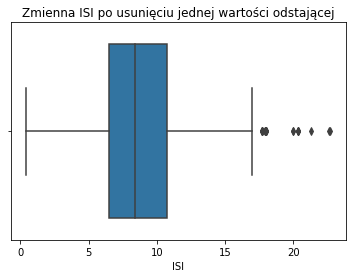

In [20]:
box_plot = sns.boxplot(forest_fires_df_2['ISI'])
box_plot.set_title('Zmienna ISI po usunięciu jednej wartości odstającej')

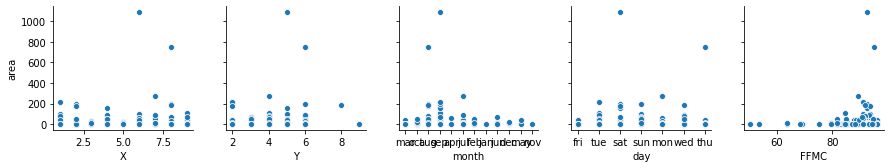

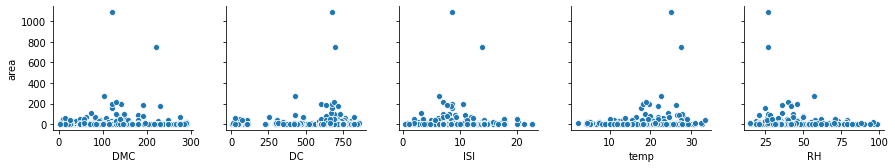

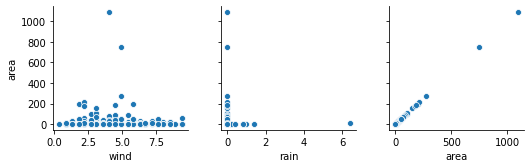

In [21]:
# wykresy zależności zmiennych do zmiennej celu
sns.pairplot(forest_fires_df_2, y_vars="area", x_vars=forest_fires_df_2.columns.values[:5])
sns.pairplot(forest_fires_df_2, y_vars="area", x_vars=forest_fires_df_2.columns.values[5:10])
sns.pairplot(forest_fires_df_2, y_vars="area", x_vars=forest_fires_df_2.columns.values[10:])

plt.show()

Z wykresów można zauważyć:
- obszar pożaru jest większy od zera tylko gdy ilość deszczu jest równa zero, wyżej jednak możemy zauważyć, że wartości zmiennej 'rain' są w znaczącej wielkości (98%) równe 0.0 więc nie możemy uznać tego za zależność


Sprawdzę jak wyglądają zależności pomiędzy mięsiącami a rozmiarem obszary.

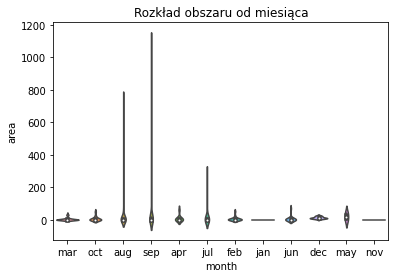

In [22]:
violin_plot = sns.violinplot(forest_fires_df_2['month'], forest_fires_df_2['area'])
violin_plot.set_title('Rozkład obszaru od miesiąca')
plt.show()

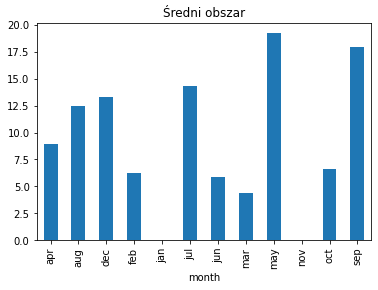

In [23]:
mean_area_month=forest_fires_df.groupby('month')['area'].mean()
mean_area_month.plot(kind='bar', title='Średni obszar')
plt.show()

Można zauważyć, że największy średni obszar pożaru jest w maju,a w styczniu i listopadzie wynosi zero.

Sprawdzę jak wyglądają zależności pomiędzy dniami a rozmiarem obszary.

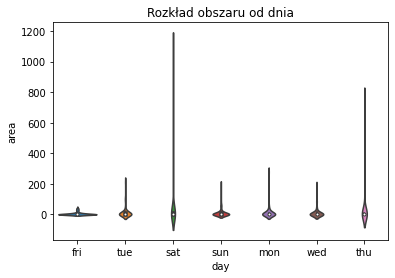

In [25]:
violin_plot = sns.violinplot(forest_fires_df['day'], forest_fires_df['area'])
violin_plot.set_title('Rozkład obszaru od dnia')
plt.show()

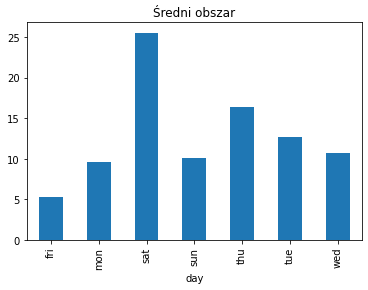

In [26]:
mean_area_month=forest_fires_df.groupby('day')['area'].mean()
mean_area_month.plot(kind='bar', title='Średni obszar')
plt.show()

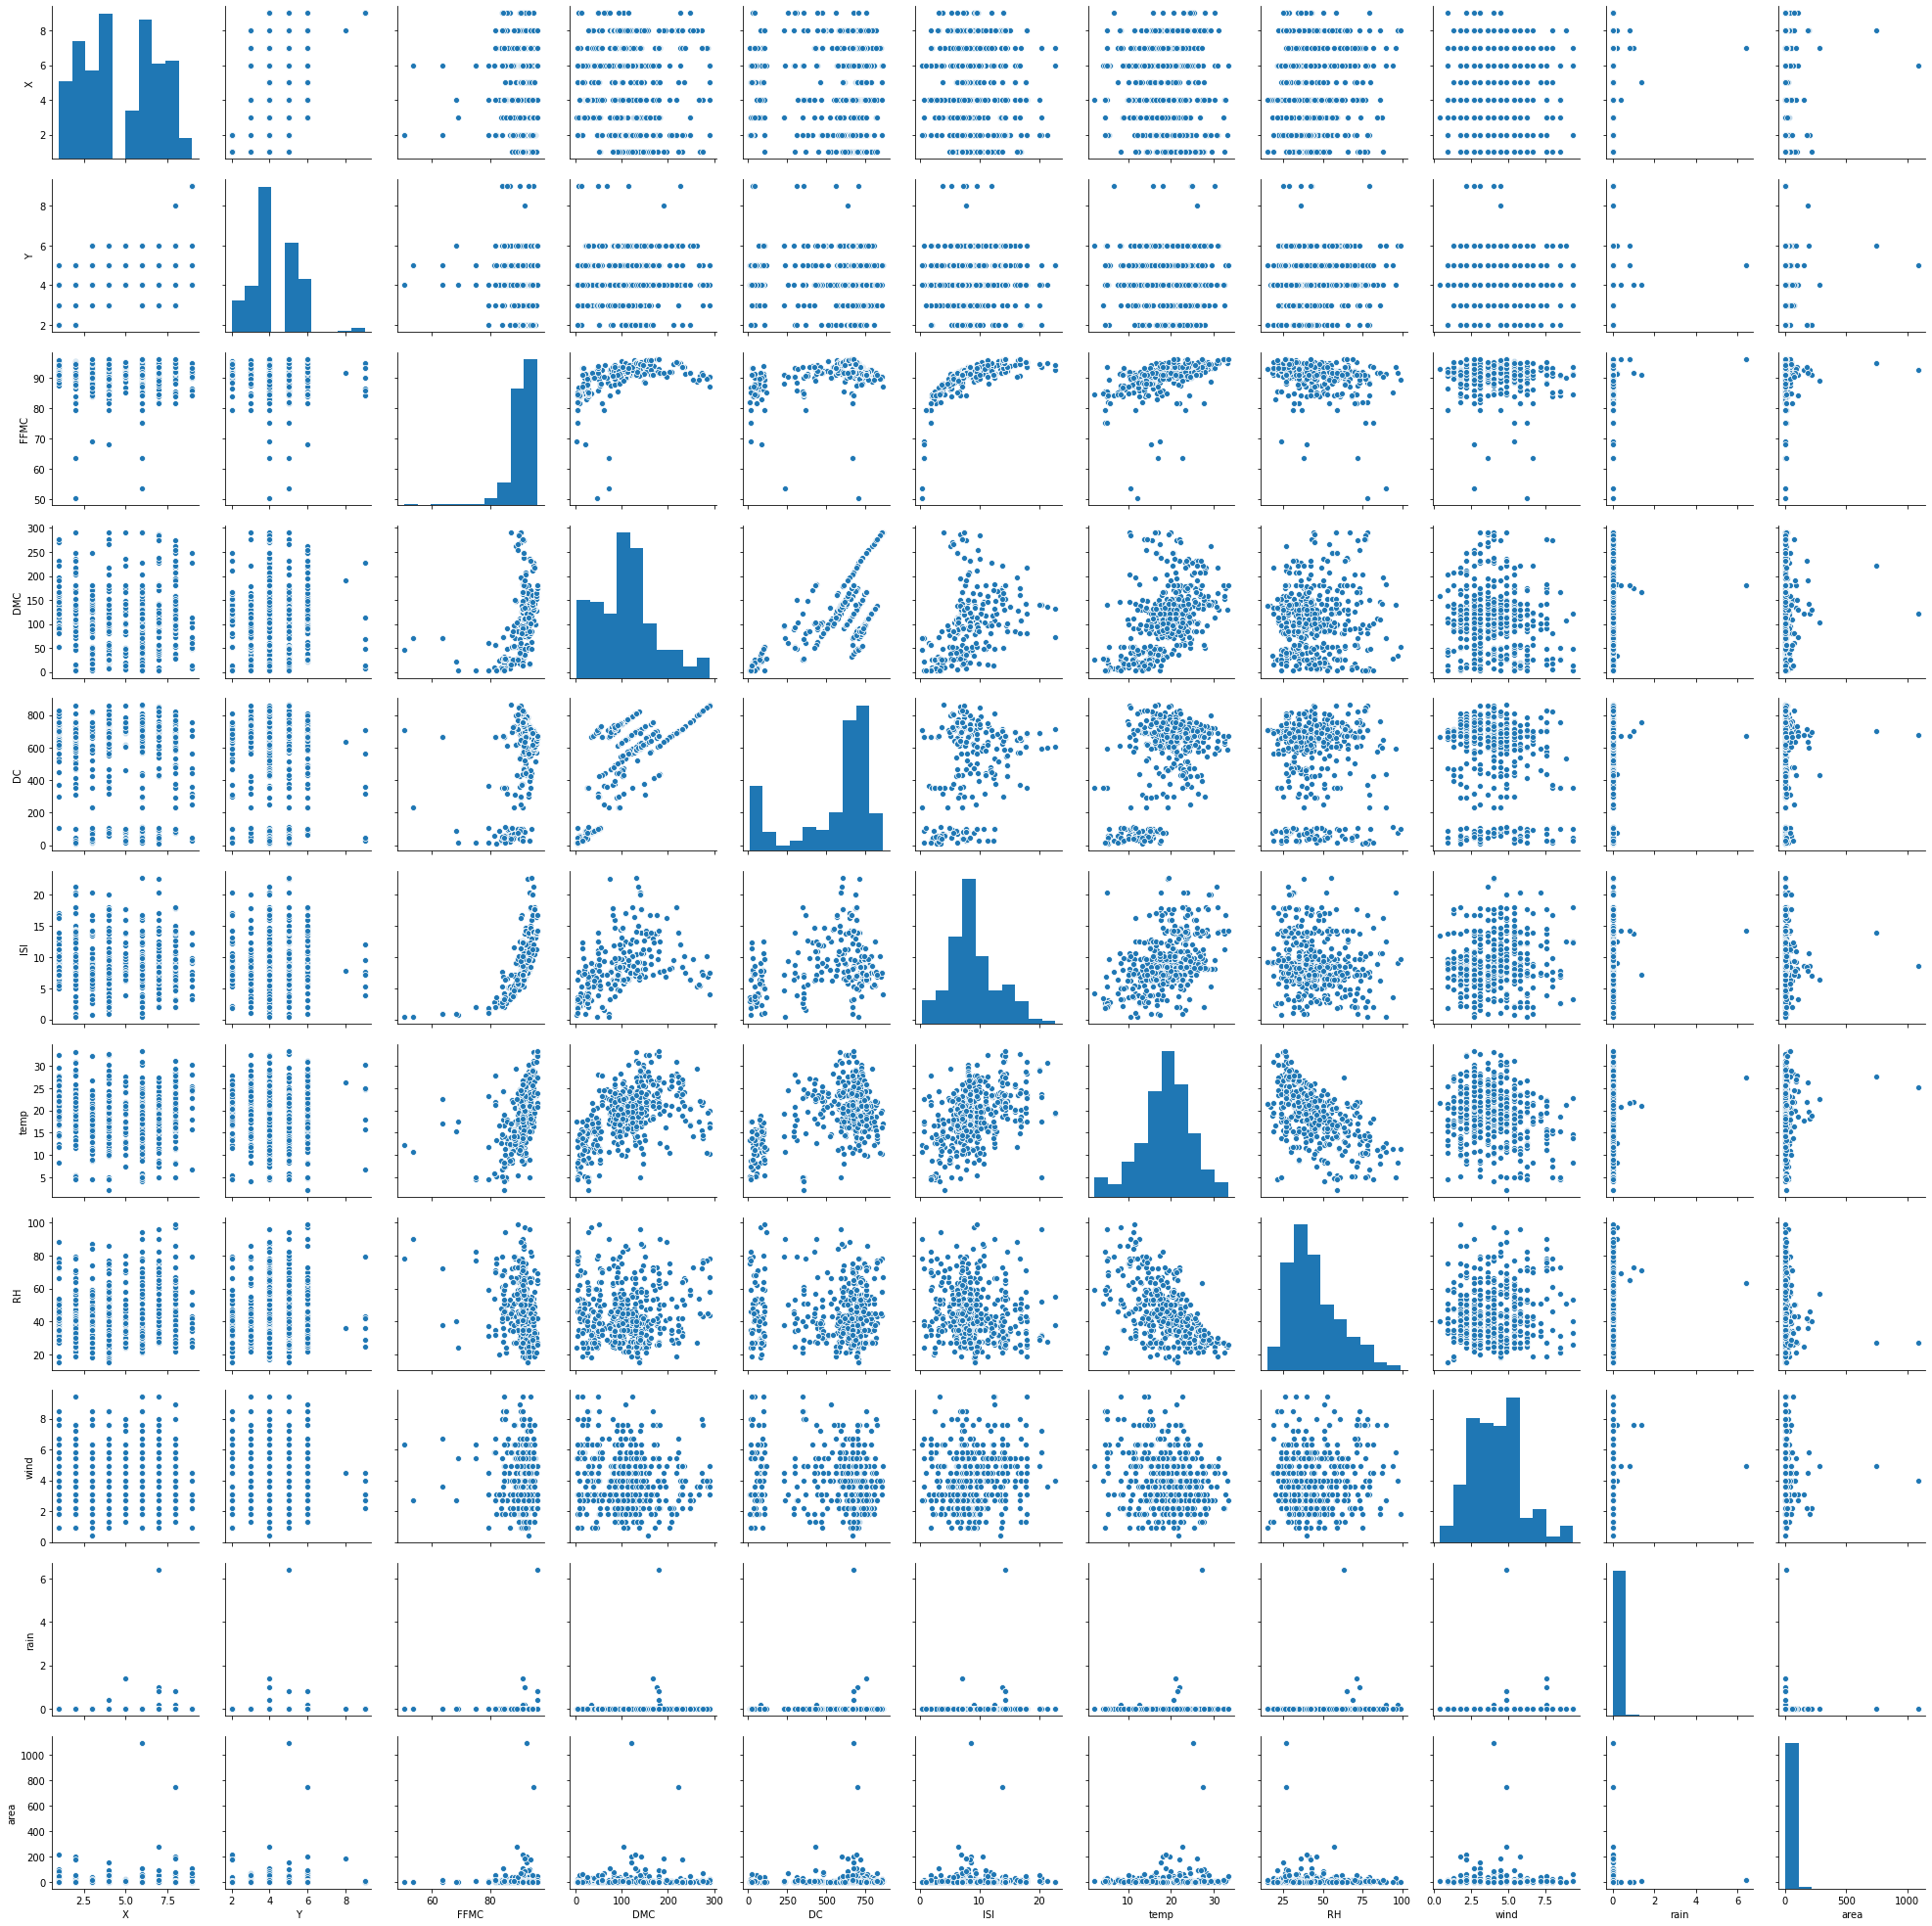

In [27]:
#wykresy zależności zmiennych między sobą
sns.pairplot(forest_fires_df_2)

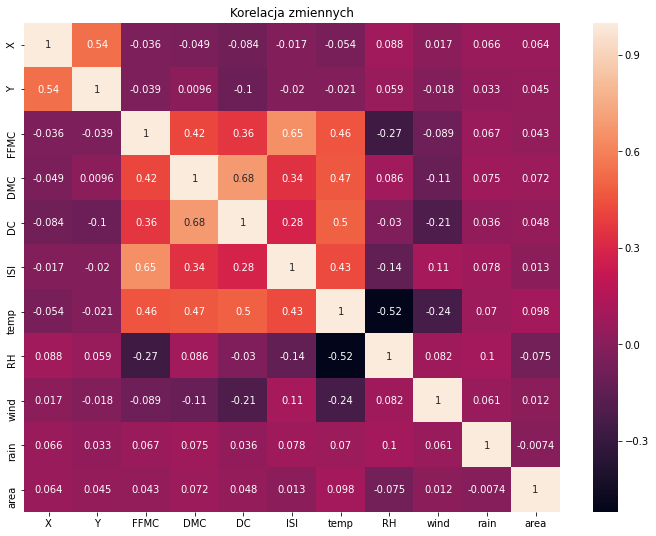

In [29]:
#macierz korelacji
corr = forest_fires_df_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
ax.set_title('Korelacja zmiennych')
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True);

 Wnioski z powyższych dwóch wykresów:
 
 - Możemy zauważyć, że indeks DMC i indeks DC są ze sobą pozytywnie skorelowane
 - Kolejnym wyróżniającym się punktem jest temperatura (temp) i wilgotność (RH), które są ujemnie skorelowane - im zimniej tym bardziej wilgotno 

## Automatyczna  eksploracja danych - pandas profiling

In [4]:
import pandas as pd 
import pandas_profiling as pp 

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(forest_fires_df,vars = {'cat': {'check_composition' : False}})
prof.to_file(output_file='ForestFiresReport.html')

variables:   0%|          | 0/13 [00:00<?, ?it/s]

correlations:   0%|          | 0/6 [00:00<?, ?it/s]

interactions [continuous]:   0%|          | 0/121 [00:00<?, ?it/s]

table:   0%|          | 0/1 [00:00<?, ?it/s]

missing:   0%|          | 0/2 [00:00<?, ?it/s]

warnings:   0%|          | 0/3 [00:00<?, ?it/s]

package:   0%|          | 0/1 [00:00<?, ?it/s]

build report structure:   0%|          | 0/1 [00:00<?, ?it/s]

### Ograniczenia

- Ograniczeniem dla narzędzia pandas-profiling może być zbyt wielki rozmiar danych. Wtedy raport będzie generowany bardzo długo. w takim wypadku można stworzyć raport nie z całych danych ale z reprezentatywnej próbki.
- Nie jest w stanie całkowicie zastąpić człowieka w eksploracji np. w momencie gdy wartościowe jest zrozumienie co dana zmienna reprezentuje. 